<a href="https://www.kaggle.com/code/shubhamgupta012/eda-and-visualization-on-data?scriptVersionId=134160268" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-employee-dataset/company_employee_details.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/company-employee-dataset/company_employee_details.csv')
df.head()

Unnamed: 0   company     department  employee_id  age  age_when_joined  \
0           0   Glasses        BigData           16   41               38   
1           1   Glasses             AI           56   44               42   
2           2  Cheerper        Support           59   41               40   
3           3   Glasses         Design           40   39               32   
4           4   Glasses  Search Engine           47   30               22   

   years_in_the_company         salary  annual_bonus  prior_years_experience  \
0                     3   68074.971354  17664.104103                       3   
1                     2   49092.147458  21551.141079                       2   
2                     1   40000.000000  23698.878851                       2   
3                     7  108192.465506  21570.929657                       1   
4                     9   71291.191132  21565.505715                       2   

   full_time  part_time  contractor  
0   0.000000   0.000000    1.000000  
1   0.000000   0.184991    1.000000  
2   0.000000   0.919887    0.662706  
3   0.930396   0.546206    0.000000  
4   0.525432   0.938412    0.000000

In [4]:
df.shape

(5000, 13)

In [5]:
df.describe()

Unnamed: 0  employee_id          age  age_when_joined  \
count  5000.000000  5000.000000  5000.000000      5000.000000   
mean   2499.500000    30.608400    38.131800        33.504600   
std    1443.520003    22.867375     6.040143         7.767165   
min       0.000000     1.000000    30.000000        22.000000   
25%    1249.750000    10.000000    33.000000        27.000000   
50%    2499.500000    29.000000    38.000000        33.000000   
75%    3749.250000    47.000000    43.000000        39.000000   
max    4999.000000    80.000000    49.000000        48.000000   

       years_in_the_company         salary  annual_bonus  \
count           5000.000000    5000.000000   5000.000000   
mean               4.662000   87169.773408  18602.668196   
std                2.547755   28387.516846   4412.142023   
min                1.000000   40000.000000   9000.000000   
25%                3.000000   66068.490326  15412.930670   
50%                5.000000   86633.575487  18786.655969   
75%                7.000000  107154.507707  22282.508900   
max                9.000000  153000.000000  24792.910000   

       prior_years_experience    full_time    part_time   contractor  
count             5000.000000  5000.000000  5000.000000  5000.000000  
mean                 2.497600     0.375924     0.387252     0.384871  
std                  1.206103     0.338760     0.341085     0.339714  
min                  1.000000     0.000000     0.000000     0.000000  
25%                  1.000000     0.009784     0.022684     0.017663  
50%                  2.000000     0.320972     0.336440     0.343933  
75%                  3.000000     0.642782     0.659128     0.648790  
max                  5.000000     1.000000     1.000000     1.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5000 non-null   int64  
 1   company                 5000 non-null   object 
 2   department              5000 non-null   object 
 3   employee_id             5000 non-null   int64  
 4   age                     5000 non-null   int64  
 5   age_when_joined         5000 non-null   int64  
 6   years_in_the_company    5000 non-null   int64  
 7   salary                  5000 non-null   float64
 8   annual_bonus            5000 non-null   float64
 9   prior_years_experience  5000 non-null   int64  
 10  full_time               5000 non-null   float64
 11  part_time               5000 non-null   float64
 12  contractor              5000 non-null   float64
dtypes: float64(5), int64(6), object(2)
memory usage: 507.9+ KB


In [7]:
df.dtypes

Unnamed: 0                  int64
company                    object
department                 object
employee_id                 int64
age                         int64
age_when_joined             int64
years_in_the_company        int64
salary                    float64
annual_bonus              float64
prior_years_experience      int64
full_time                 float64
part_time                 float64
contractor                float64
dtype: object

In [8]:
df.isnull().sum()

Unnamed: 0                0
company                   0
department                0
employee_id               0
age                       0
age_when_joined           0
years_in_the_company      0
salary                    0
annual_bonus              0
prior_years_experience    0
full_time                 0
part_time                 0
contractor                0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['company'].value_counts()

Glasses     2369
Cheerper    1440
Pear        1191
Name: company, dtype: int64

In [11]:
df['department'].value_counts()

AI               1128
Search Engine    1071
BigData           797
Design            720
Sales             653
Support           631
Name: department, dtype: int64

In [12]:
df['prior_years_experience'].value_counts()

2    1341
1    1289
3    1278
4     777
5     315
Name: prior_years_experience, dtype: int64

Text(0.5, 1.0, 'Various Company in which Employee works')

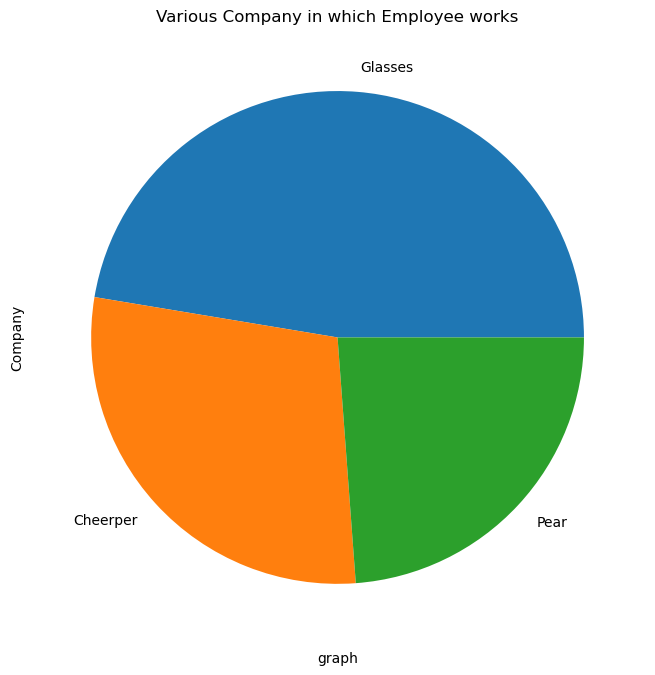

In [13]:
plt.figure(figsize=(20,8))
df['company'].value_counts().plot.pie()
plt.ylabel('Company')
plt.xlabel('graph')
plt.title('Various Company in which Employee works')

Text(0.5, 1.0, 'Various Department in which Employee works')

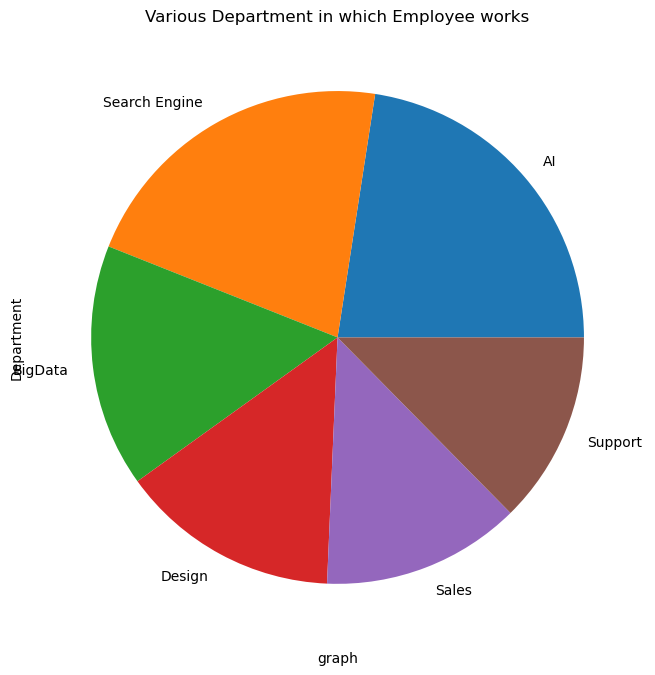

In [14]:
plt.figure(figsize=(20,8))
df['department'].value_counts().plot.pie()
plt.ylabel('Department')
plt.xlabel('graph')
plt.title('Various Department in which Employee works')

In [15]:
plt.figure(figsize=(20,8))
df['prior_years_experience'].value_counts().plot.pie()
plt.ylabel('Prior year Experience')
plt.xlabel('graph')
plt.title('Years of Prior Experience')

Text(0.5, 1.0, 'Years of Prior Experience')

In [16]:
import seaborn as sns

Text(0.5, 1.0, 'Histogram of Age when joined')

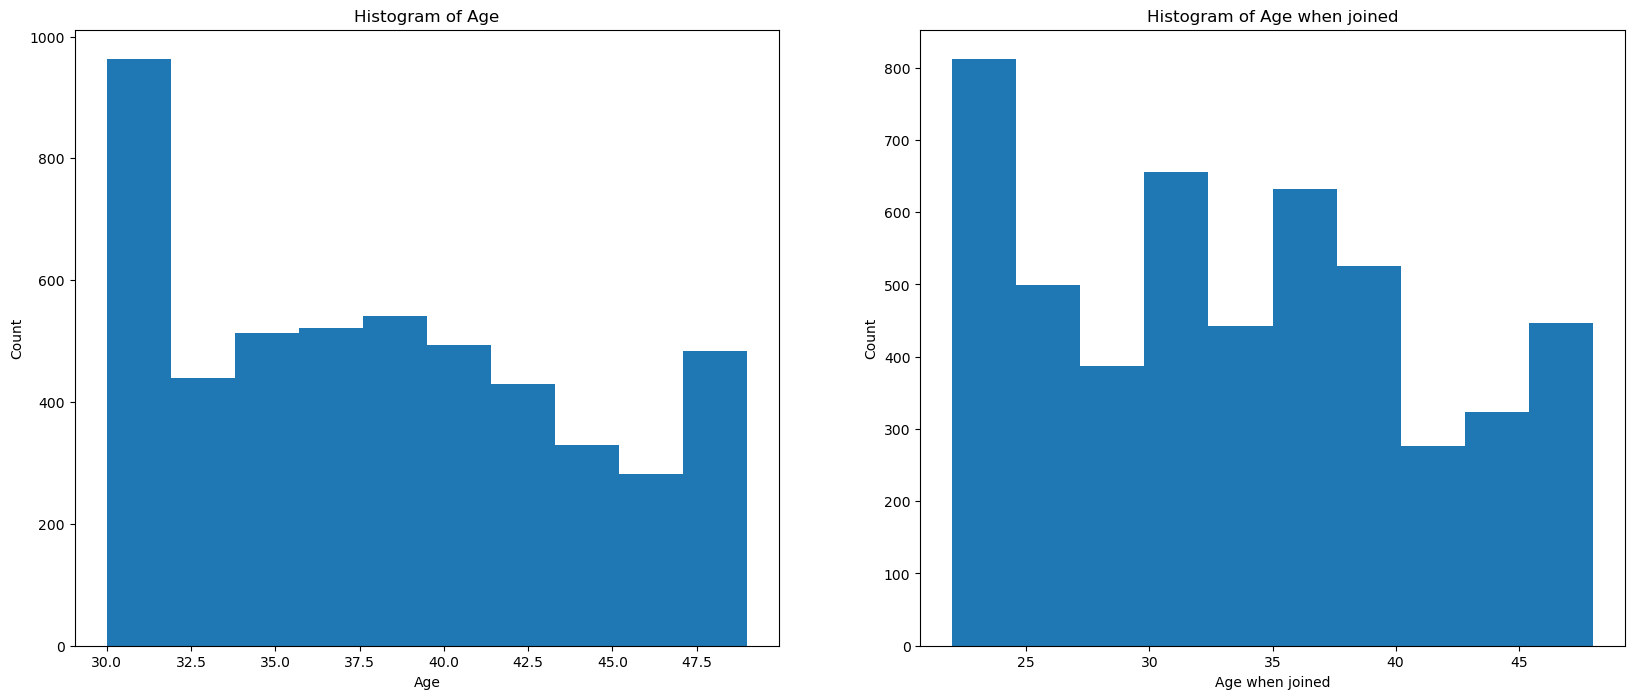

In [17]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.subplot(1,2,2)
plt.hist(df['age_when_joined'])
plt.xlabel('Age when joined')
plt.ylabel('Count')
plt.title('Histogram of Age when joined')

Text(0.5, 1.0, 'Histogram of contractor or not')

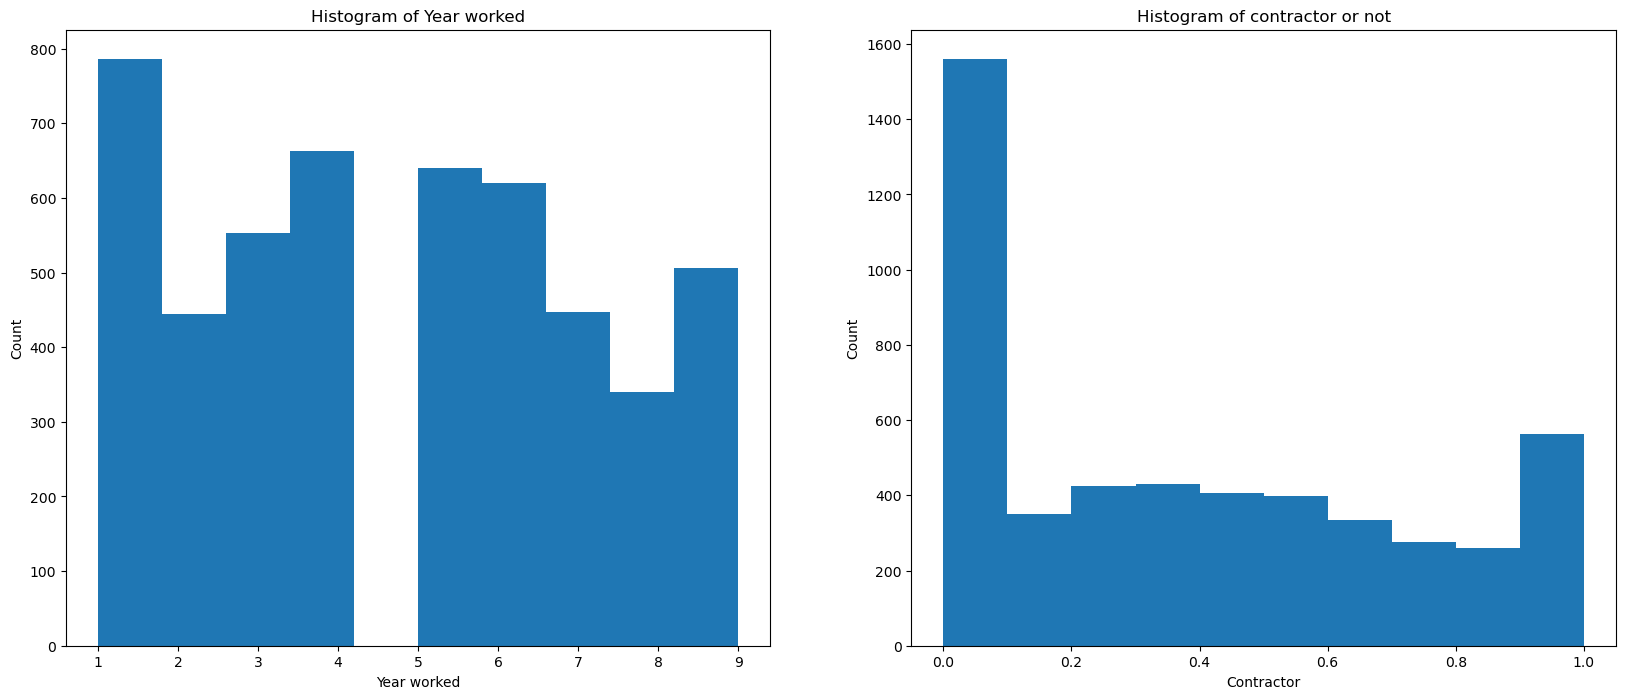

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(df['years_in_the_company'])
plt.xlabel('Year worked')
plt.ylabel('Count')
plt.title('Histogram of Year worked')
plt.subplot(1,2,2)
plt.hist(df['contractor'])
plt.xlabel('Contractor')
plt.ylabel('Count')
plt.title('Histogram of contractor or not')

Text(0.5, 1.0, 'Histogram of Annual Bonus received')

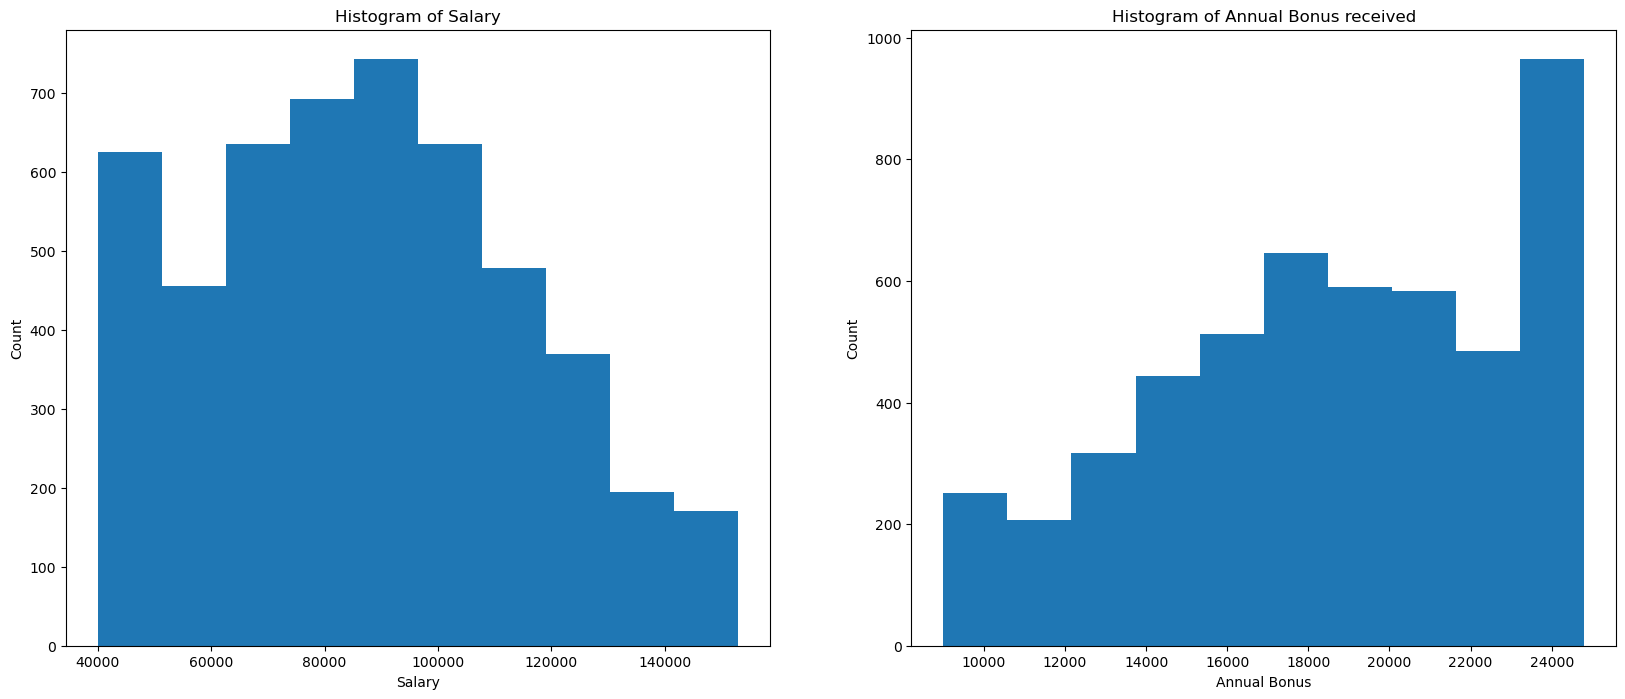

In [19]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(df['salary'])
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Histogram of Salary')
plt.subplot(1,2,2)
plt.hist(df['annual_bonus'])
plt.xlabel('Annual Bonus')
plt.ylabel('Count')
plt.title('Histogram of Annual Bonus received')

In [20]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(df['full_time'])
plt.xlabel('Full Time')
plt.ylabel('Count')
plt.title('Histogram of Full Time Employee')
plt.subplot(1,2,2)
plt.hist(df['part_time'])
plt.xlabel('Part Time')
plt.ylabel('Count')
plt.title('Histogram of Part Time Employee')

Text(0.5, 1.0, 'Histogram of Part Time Employee')

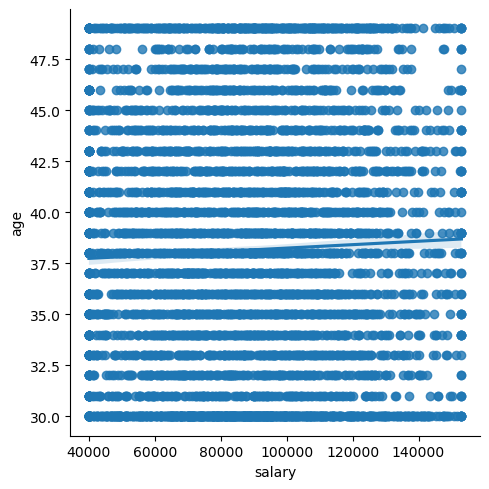

In [21]:
sns.lmplot(data=df, x="salary", y="age")

In [22]:
df['employment_type'] = df[['full_time', 'part_time', 'contractor']].idxmax(axis=1).str.upper()

In [23]:
df.head()

Unnamed: 0   company     department  employee_id  age  age_when_joined  \
0           0   Glasses        BigData           16   41               38   
1           1   Glasses             AI           56   44               42   
2           2  Cheerper        Support           59   41               40   
3           3   Glasses         Design           40   39               32   
4           4   Glasses  Search Engine           47   30               22   

   years_in_the_company         salary  annual_bonus  prior_years_experience  \
0                     3   68074.971354  17664.104103                       3   
1                     2   49092.147458  21551.141079                       2   
2                     1   40000.000000  23698.878851                       2   
3                     7  108192.465506  21570.929657                       1   
4                     9   71291.191132  21565.505715                       2   

   full_time  part_time  contractor employment_type  
0   0.000000   0.000000    1.000000      CONTRACTOR  
1   0.000000   0.184991    1.000000      CONTRACTOR  
2   0.000000   0.919887    0.662706       PART_TIME  
3   0.930396   0.546206    0.000000       FULL_TIME  
4   0.525432   0.938412    0.000000       PART_TIME

In [24]:
df['employment_type'].value_counts()

CONTRACTOR    1693
PART_TIME     1677
FULL_TIME     1630
Name: employment_type, dtype: int64

<Axes: ylabel='employment_type'>

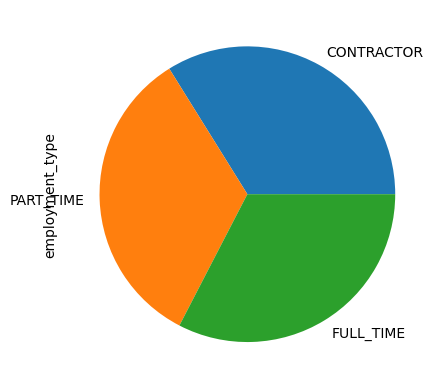

In [25]:
df['employment_type'].value_counts().plot.pie()

In [26]:
sns.countplot(data=df, x="years_in_the_company")

<Axes: xlabel='years_in_the_company', ylabel='count'>

<Axes: xlabel='employment_type', ylabel='count'>

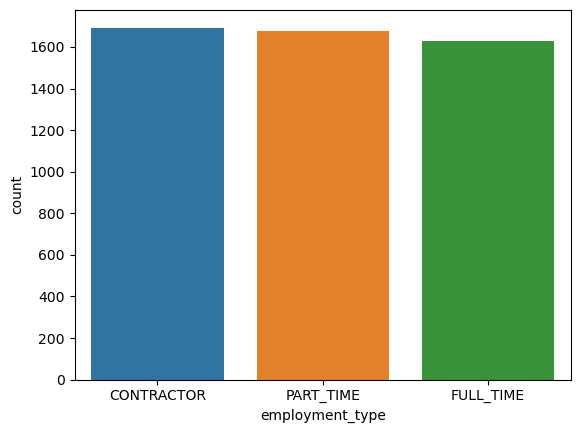

In [27]:
sns.countplot(data=df,x='employment_type')

<Axes: xlabel='department', ylabel='count'>

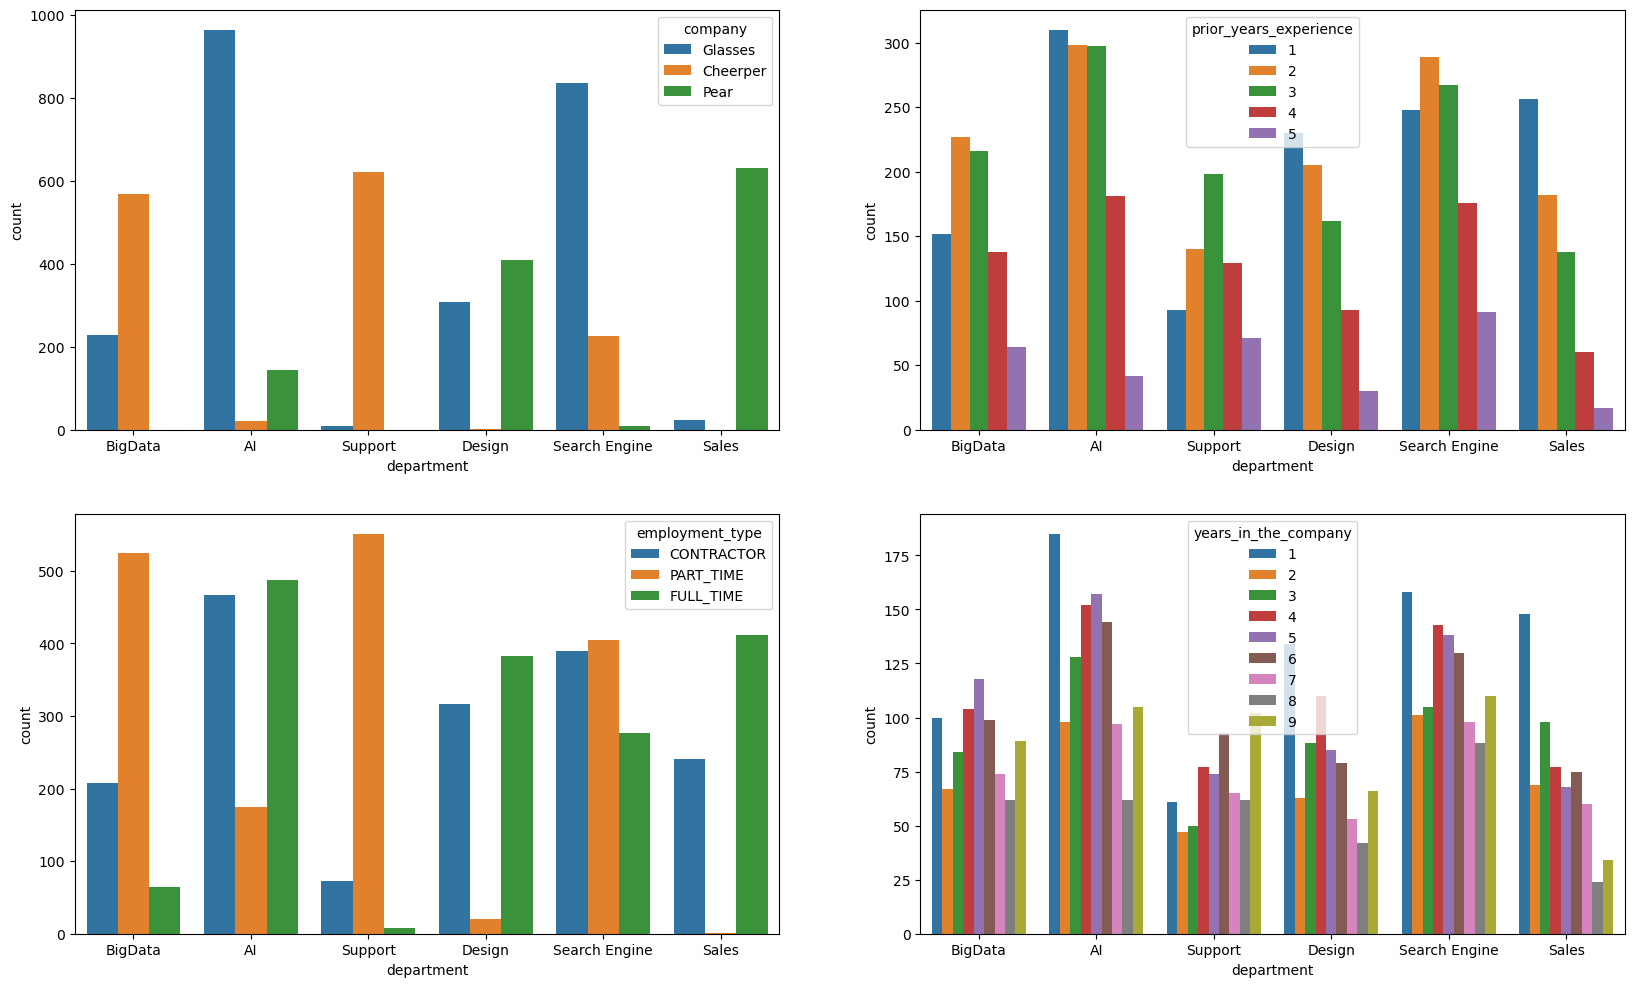

In [28]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(data=df, x="department",hue='company')
plt.subplot(2,2,2)
sns.countplot(data=df, x="department",hue='prior_years_experience')
plt.subplot(2,2,3)
sns.countplot(data=df, x="department",hue='employment_type')
plt.subplot(2,2,4)
sns.countplot(data=df, x="department",hue='years_in_the_company')

<Axes: xlabel='company', ylabel='count'>

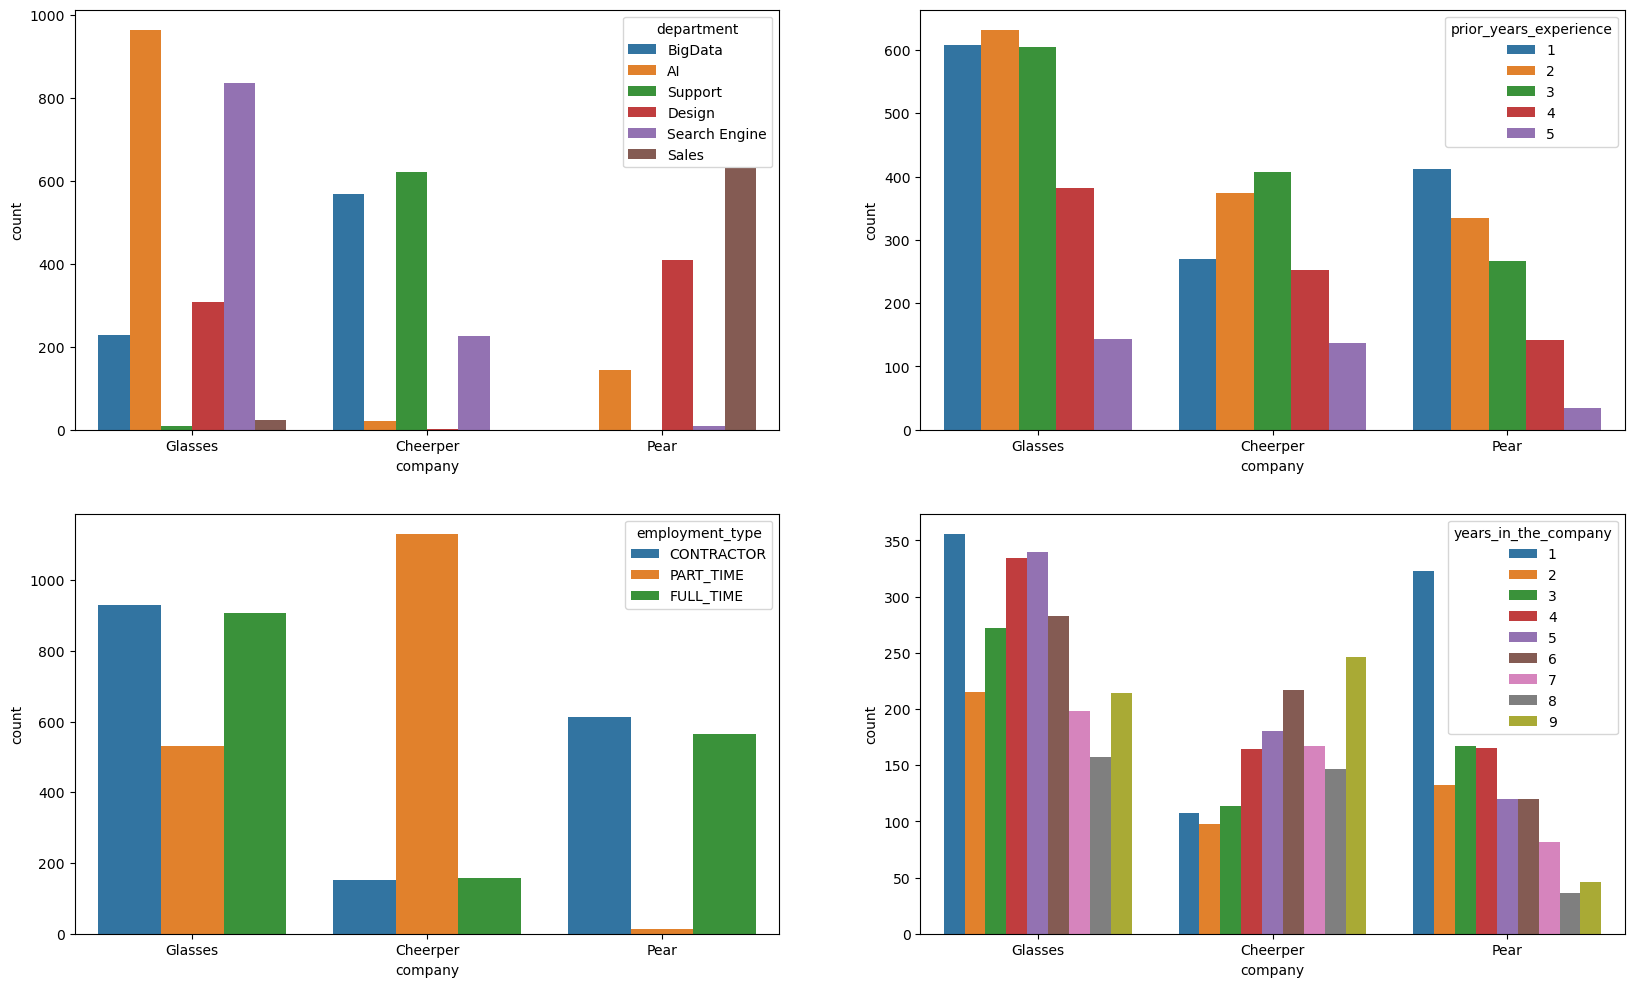

In [29]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(data=df, x="company",hue='department')
plt.subplot(2,2,2)
sns.countplot(data=df, x="company",hue='prior_years_experience')
plt.subplot(2,2,3)
sns.countplot(data=df, x="company",hue='employment_type')
plt.subplot(2,2,4)
sns.countplot(data=df, x="company",hue='years_in_the_company')

<Axes: xlabel='employment_type', ylabel='count'>

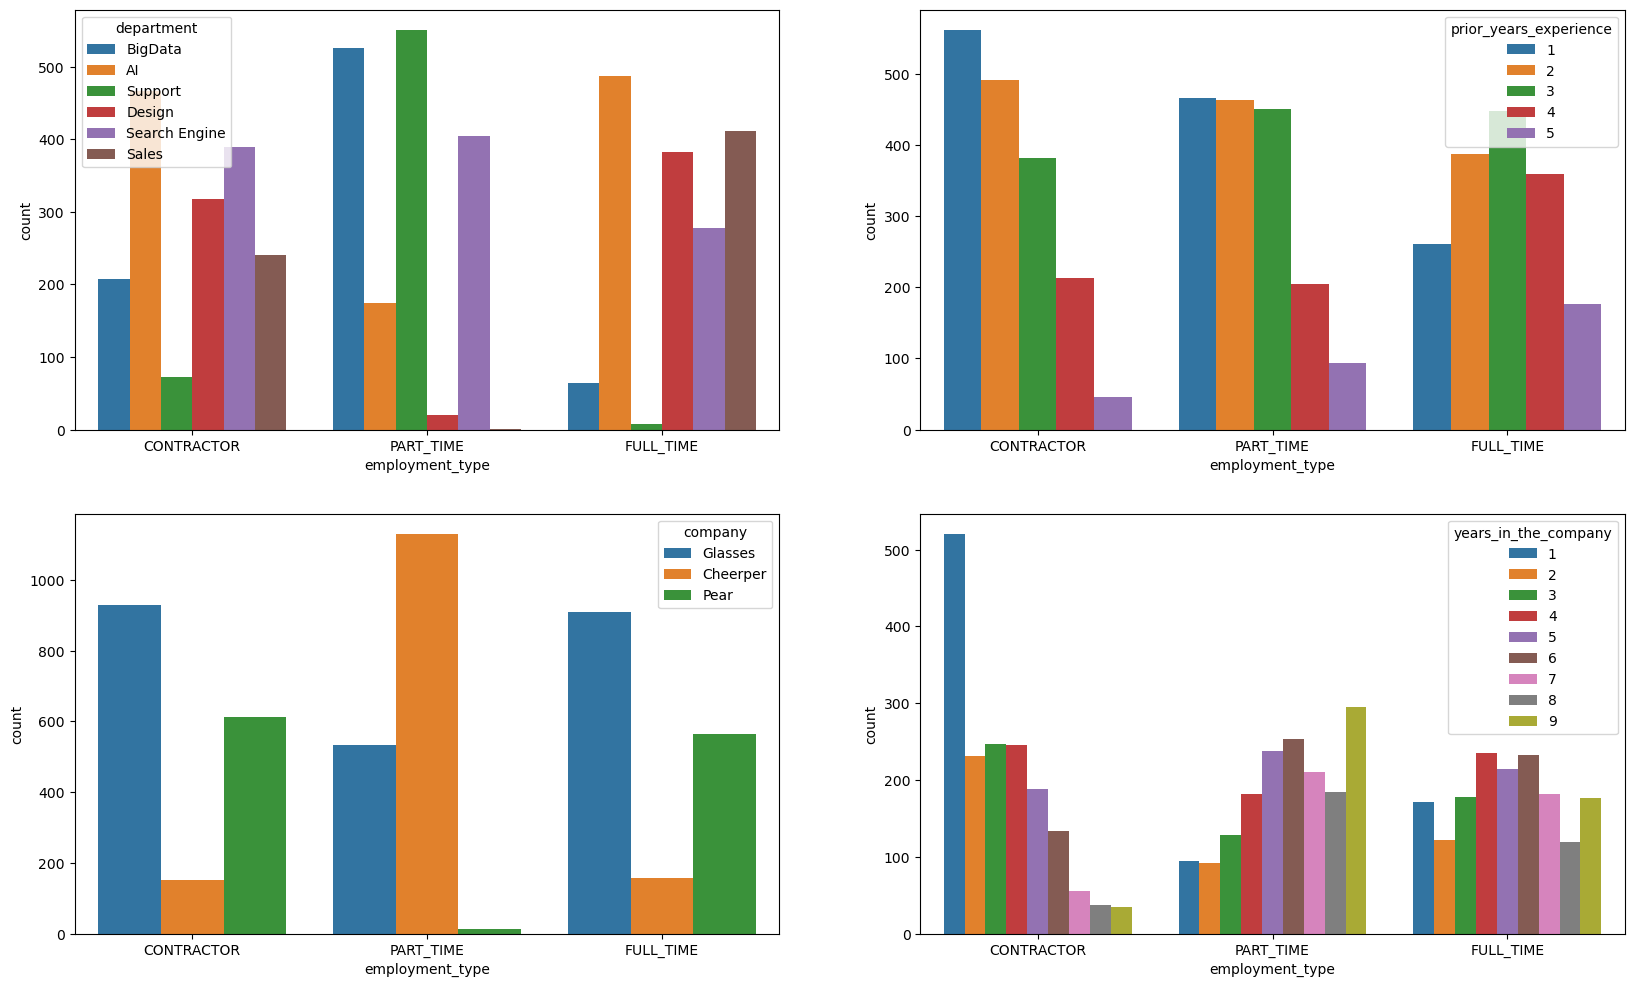

In [30]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(data=df, x="employment_type",hue='department')
plt.subplot(2,2,2)
sns.countplot(data=df, x="employment_type",hue='prior_years_experience')
plt.subplot(2,2,3)
sns.countplot(data=df, x="employment_type",hue='company')
plt.subplot(2,2,4)
sns.countplot(data=df, x="employment_type",hue='years_in_the_company')

<Axes: xlabel='prior_years_experience', ylabel='count'>

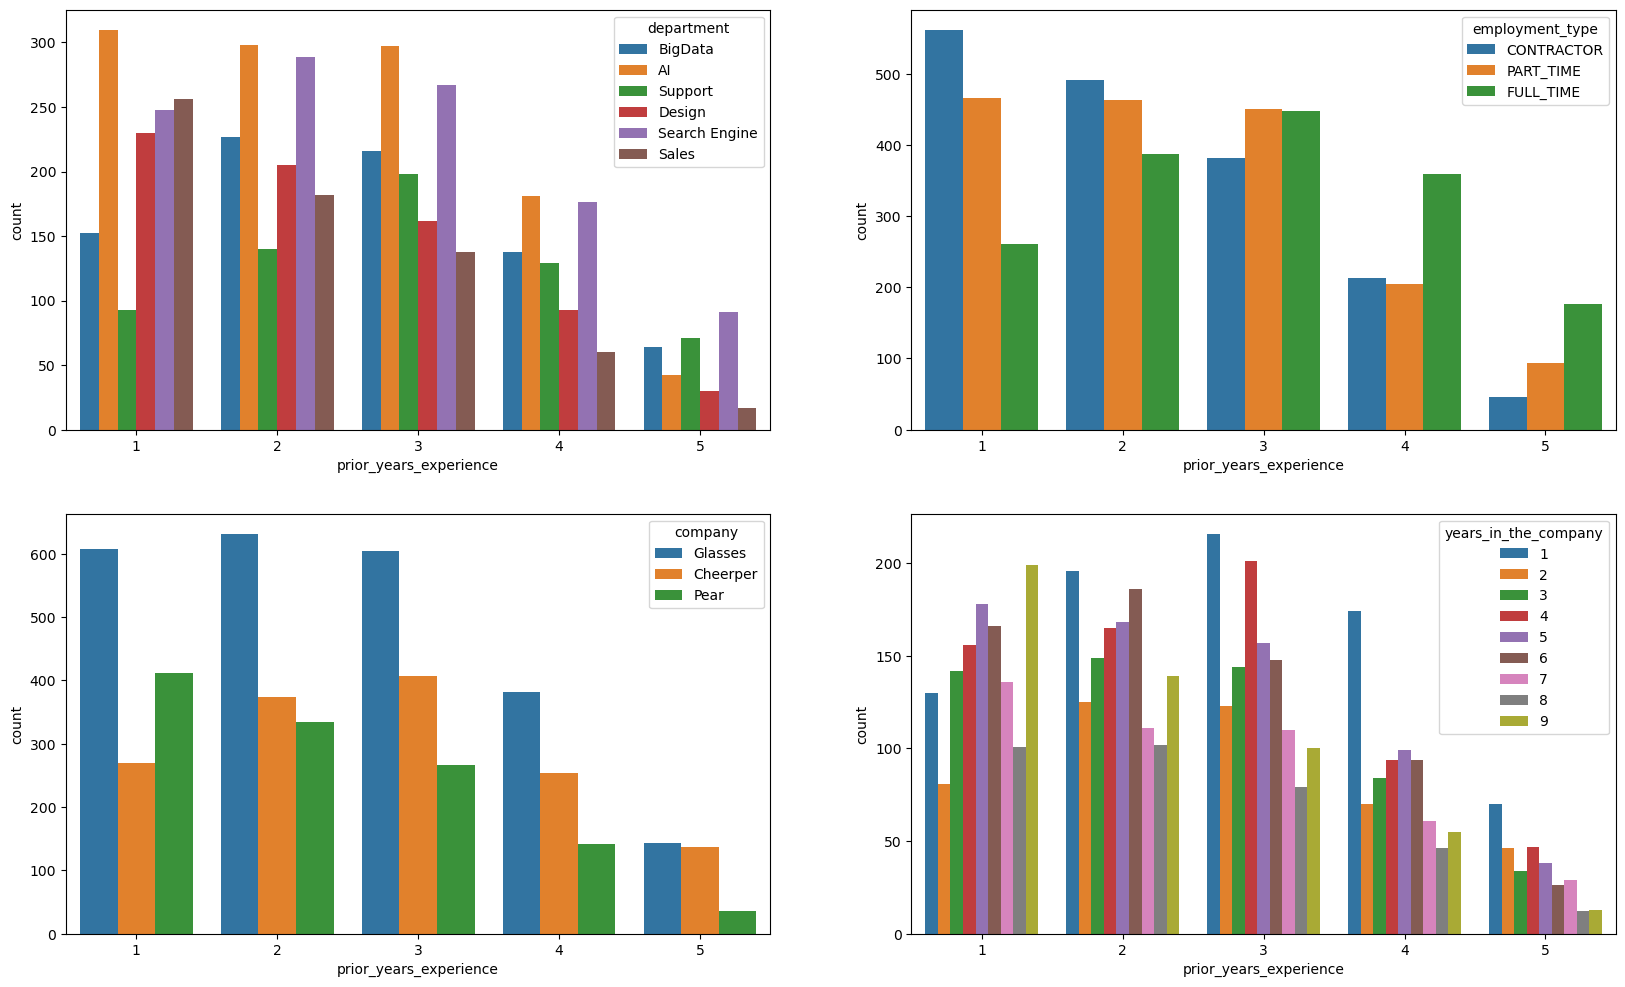

In [31]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(data=df, x="prior_years_experience",hue='department')
plt.subplot(2,2,2)
sns.countplot(data=df, x="prior_years_experience",hue='employment_type')
plt.subplot(2,2,3)
sns.countplot(data=df, x="prior_years_experience",hue='company')
plt.subplot(2,2,4)
sns.countplot(data=df, x="prior_years_experience",hue='years_in_the_company')

<Axes: xlabel='years_in_the_company', ylabel='count'>

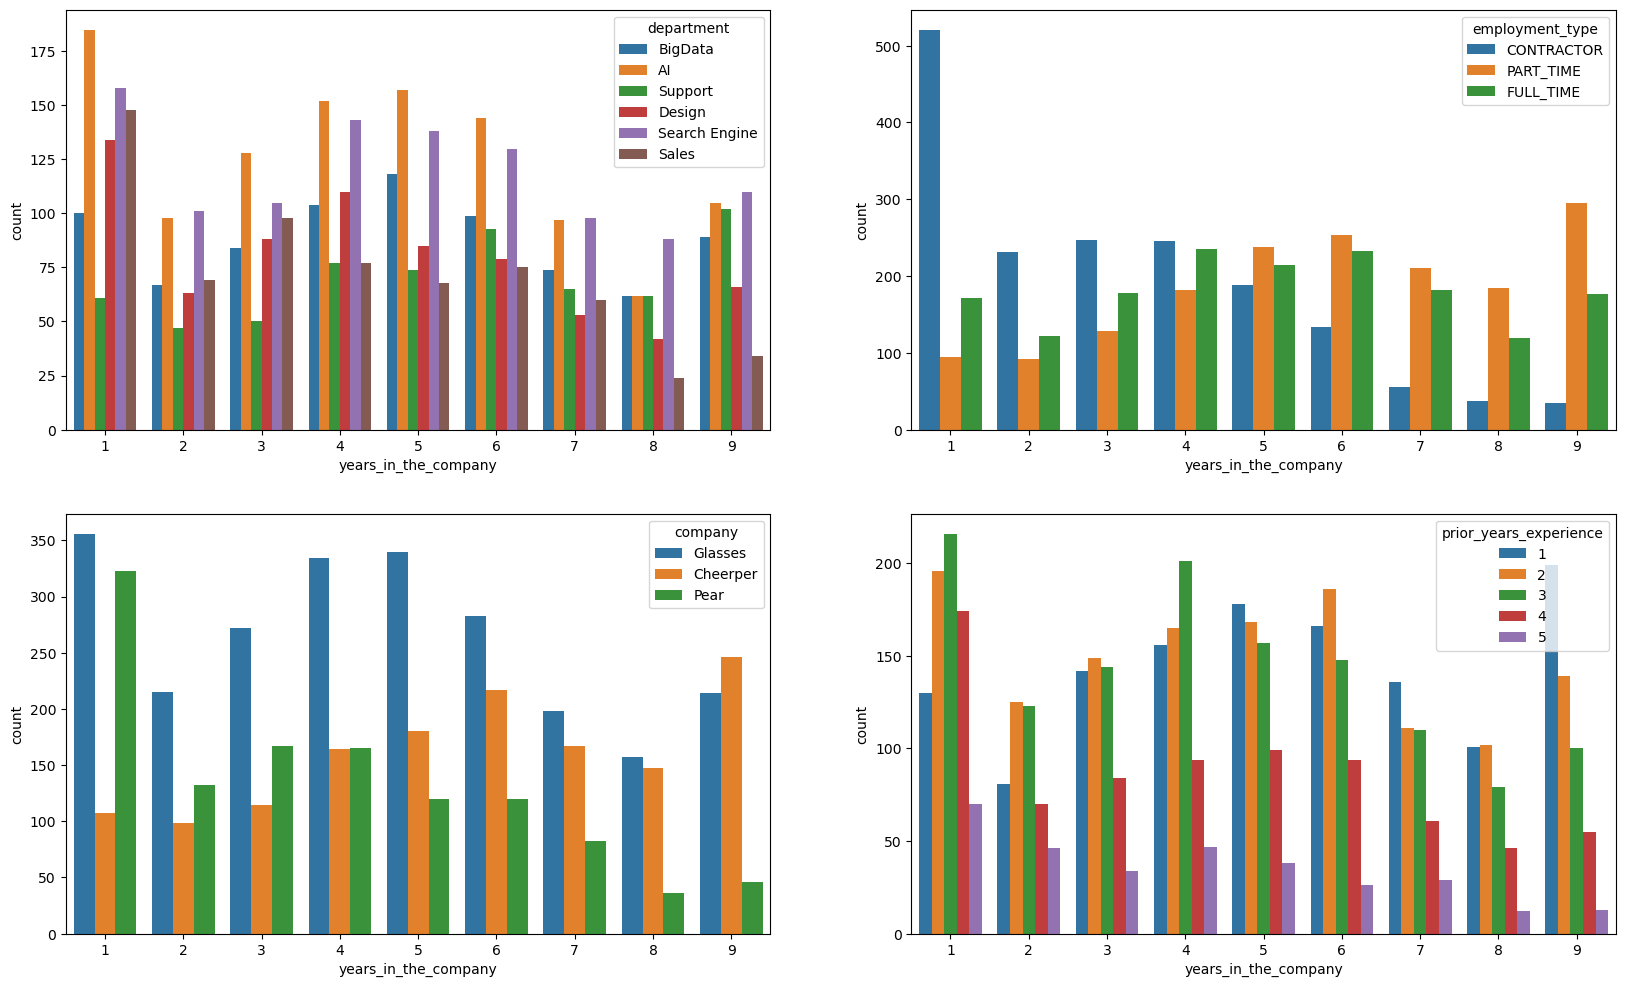

In [32]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(data=df, x="years_in_the_company",hue='department')
plt.subplot(2,2,2)
sns.countplot(data=df, x="years_in_the_company",hue='employment_type')
plt.subplot(2,2,3)
sns.countplot(data=df, x="years_in_the_company",hue='company')
plt.subplot(2,2,4)
sns.countplot(data=df, x="years_in_the_company",hue='prior_years_experience')

In [33]:
corr = df.corr()
corr

/tmp/ipykernel_20/2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Unnamed: 0  employee_id       age  age_when_joined  \
Unnamed: 0                1.000000    -0.014909 -0.016318        -0.018421   
employee_id              -0.014909     1.000000  0.340953         0.405872   
age                      -0.016318     0.340953  1.000000         0.939416   
age_when_joined          -0.018421     0.405872  0.939416         1.000000   
years_in_the_company      0.011484    -0.342049 -0.347832        -0.620709   
salary                   -0.003608    -0.633798  0.039504         0.036625   
annual_bonus              0.008080    -0.205972 -0.182320        -0.150242   
prior_years_experience   -0.002911     0.223372 -0.099372        -0.025185   
full_time                -0.007159    -0.317884 -0.149056        -0.170995   
part_time                 0.005459     0.144588 -0.037947        -0.162787   
contractor               -0.013717     0.178884  0.192404         0.342308   

                        years_in_the_company    salary  annual_bonus  \
Unnamed: 0                          0.011484 -0.003608      0.008080   
employee_id                        -0.342049 -0.633798     -0.205972   
age                                -0.347832  0.039504     -0.182320   
age_when_joined                    -0.620709  0.036625     -0.150242   
years_in_the_company                1.000000 -0.007716     -0.004983   
salary                             -0.007716  1.000000      0.007697   
annual_bonus                       -0.004983  0.007697      1.000000   
prior_years_experience             -0.161514 -0.040803     -0.723311   
full_time                           0.142220  0.747188     -0.244451   
part_time                           0.387753 -0.416452      0.055112   
contractor                         -0.533158 -0.309565      0.187669   

                        prior_years_experience  full_time  part_time  \
Unnamed: 0                           -0.002911  -0.007159   0.005459   
employee_id                           0.223372  -0.317884   0.144588   
age                                  -0.099372  -0.149056  -0.037947   
age_when_joined                      -0.025185  -0.170995  -0.162787   
years_in_the_company                 -0.161514   0.142220   0.387753   
salary                               -0.040803   0.747188  -0.416452   
annual_bonus                         -0.723311  -0.244451   0.055112   
prior_years_experience                1.000000   0.273146  -0.069652   
full_time                             0.273146   1.000000  -0.443314   
part_time                            -0.069652  -0.443314   1.000000   
contractor                           -0.196053  -0.445054  -0.454094   

                        contractor  
Unnamed: 0               -0.013717  
employee_id               0.178884  
age                       0.192404  
age_when_joined           0.342308  
years_in_the_company     -0.533158  
salary                   -0.309565  
annual_bonus              0.187669  
prior_years_experience   -0.196053  
full_time                -0.445054  
part_time                -0.454094  
contractor                1.000000

<Axes: >

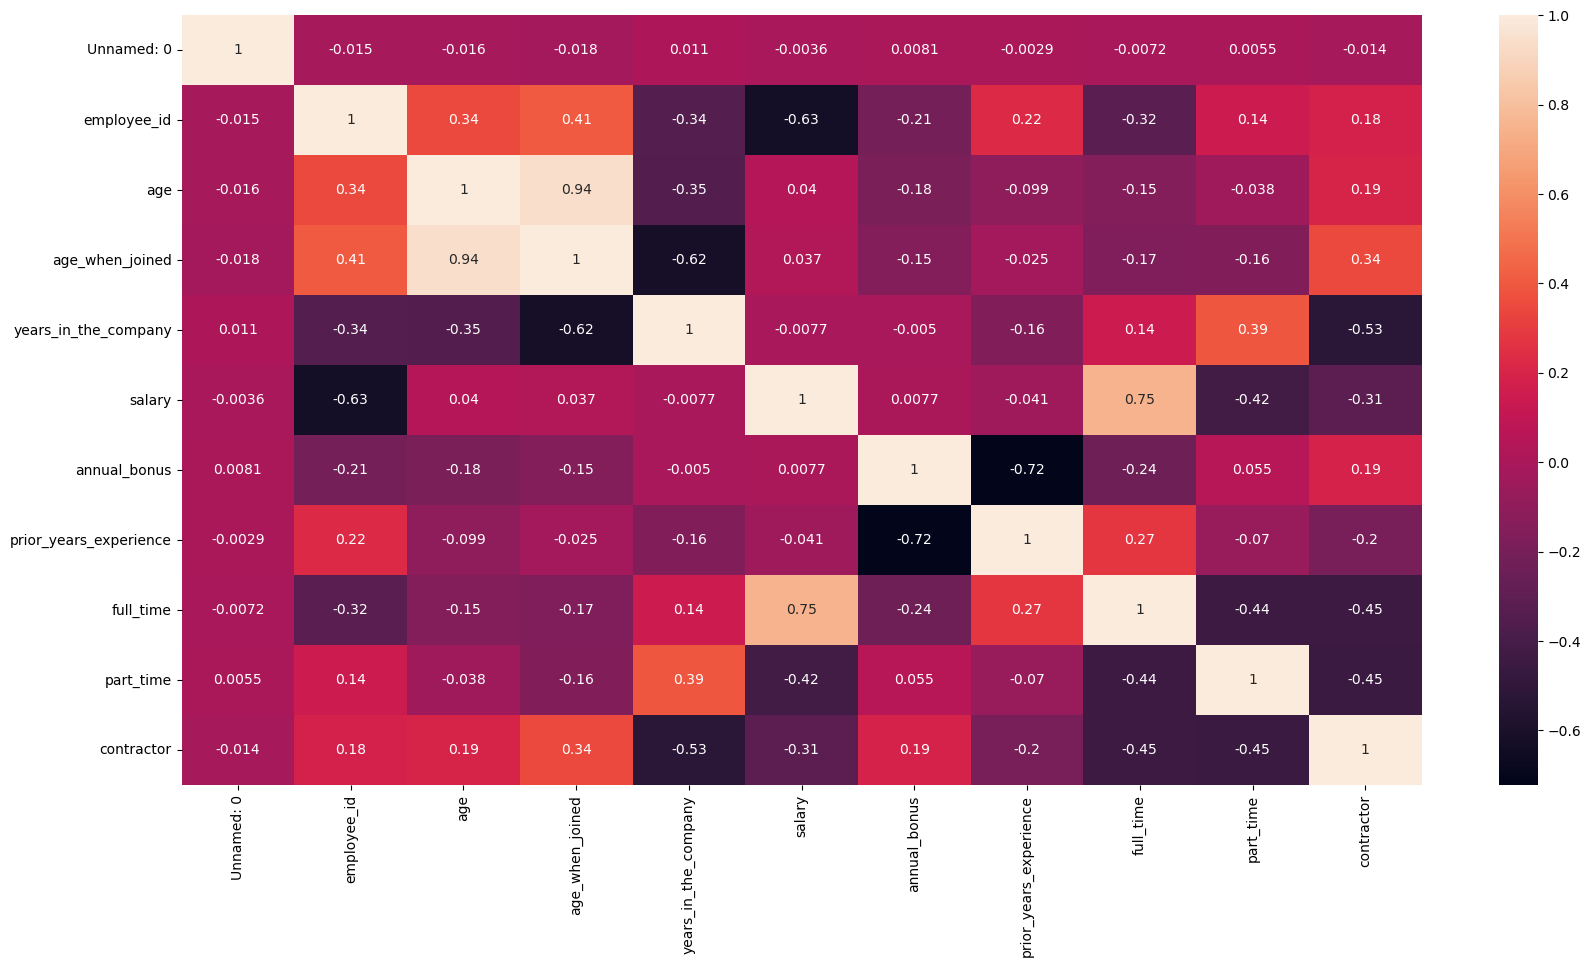

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

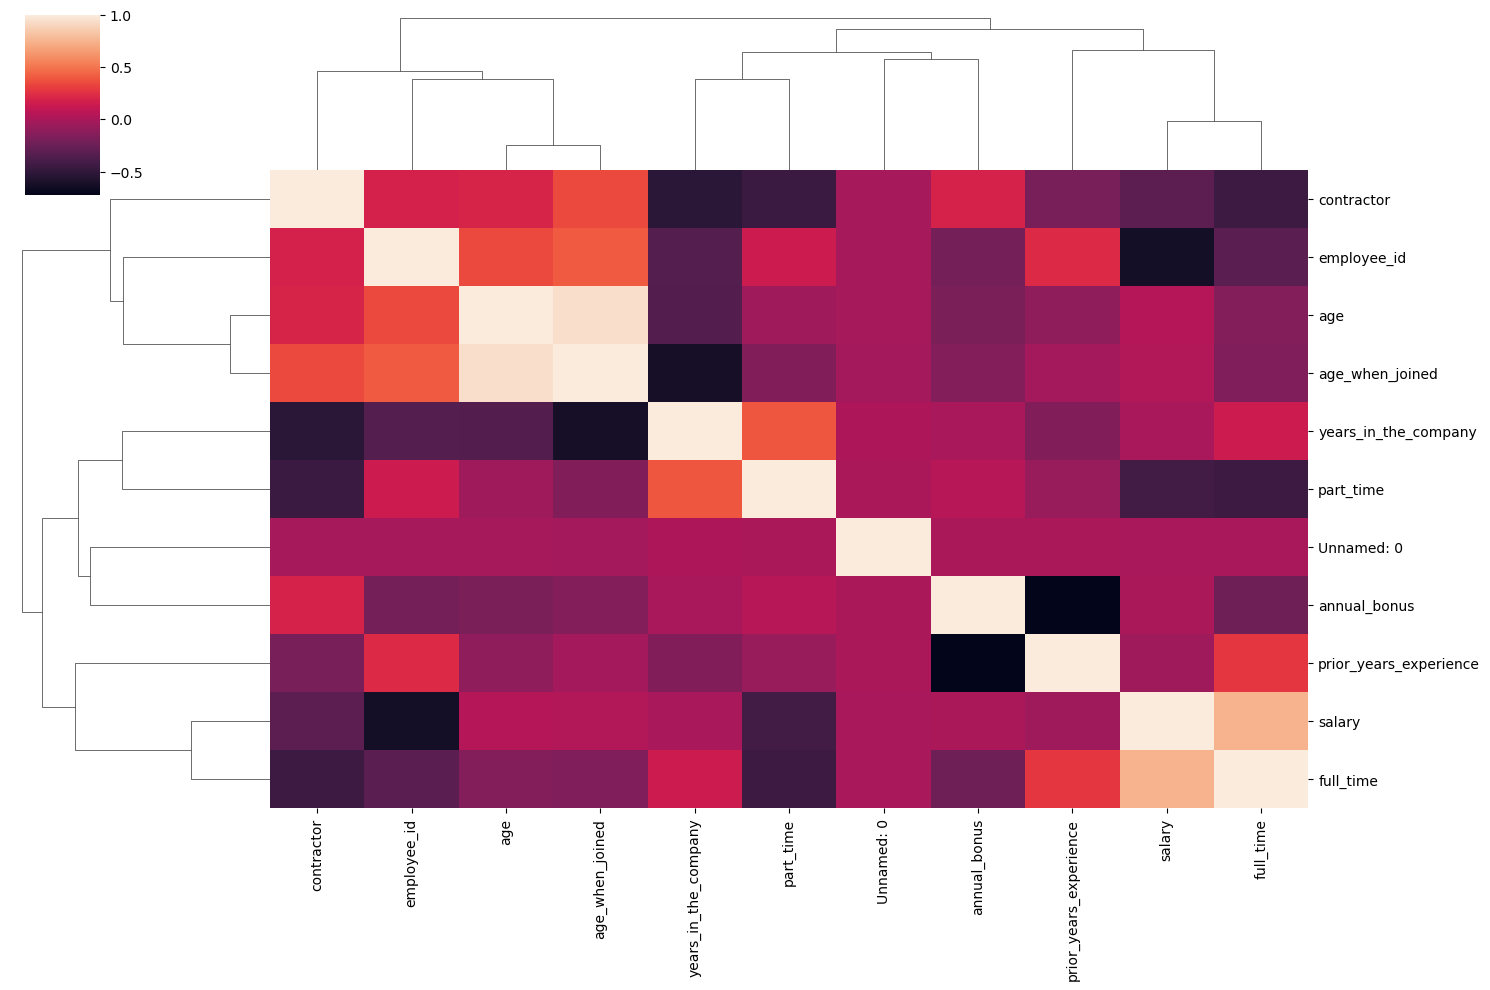

In [35]:
sns.clustermap(corr,figsize=(15,10))

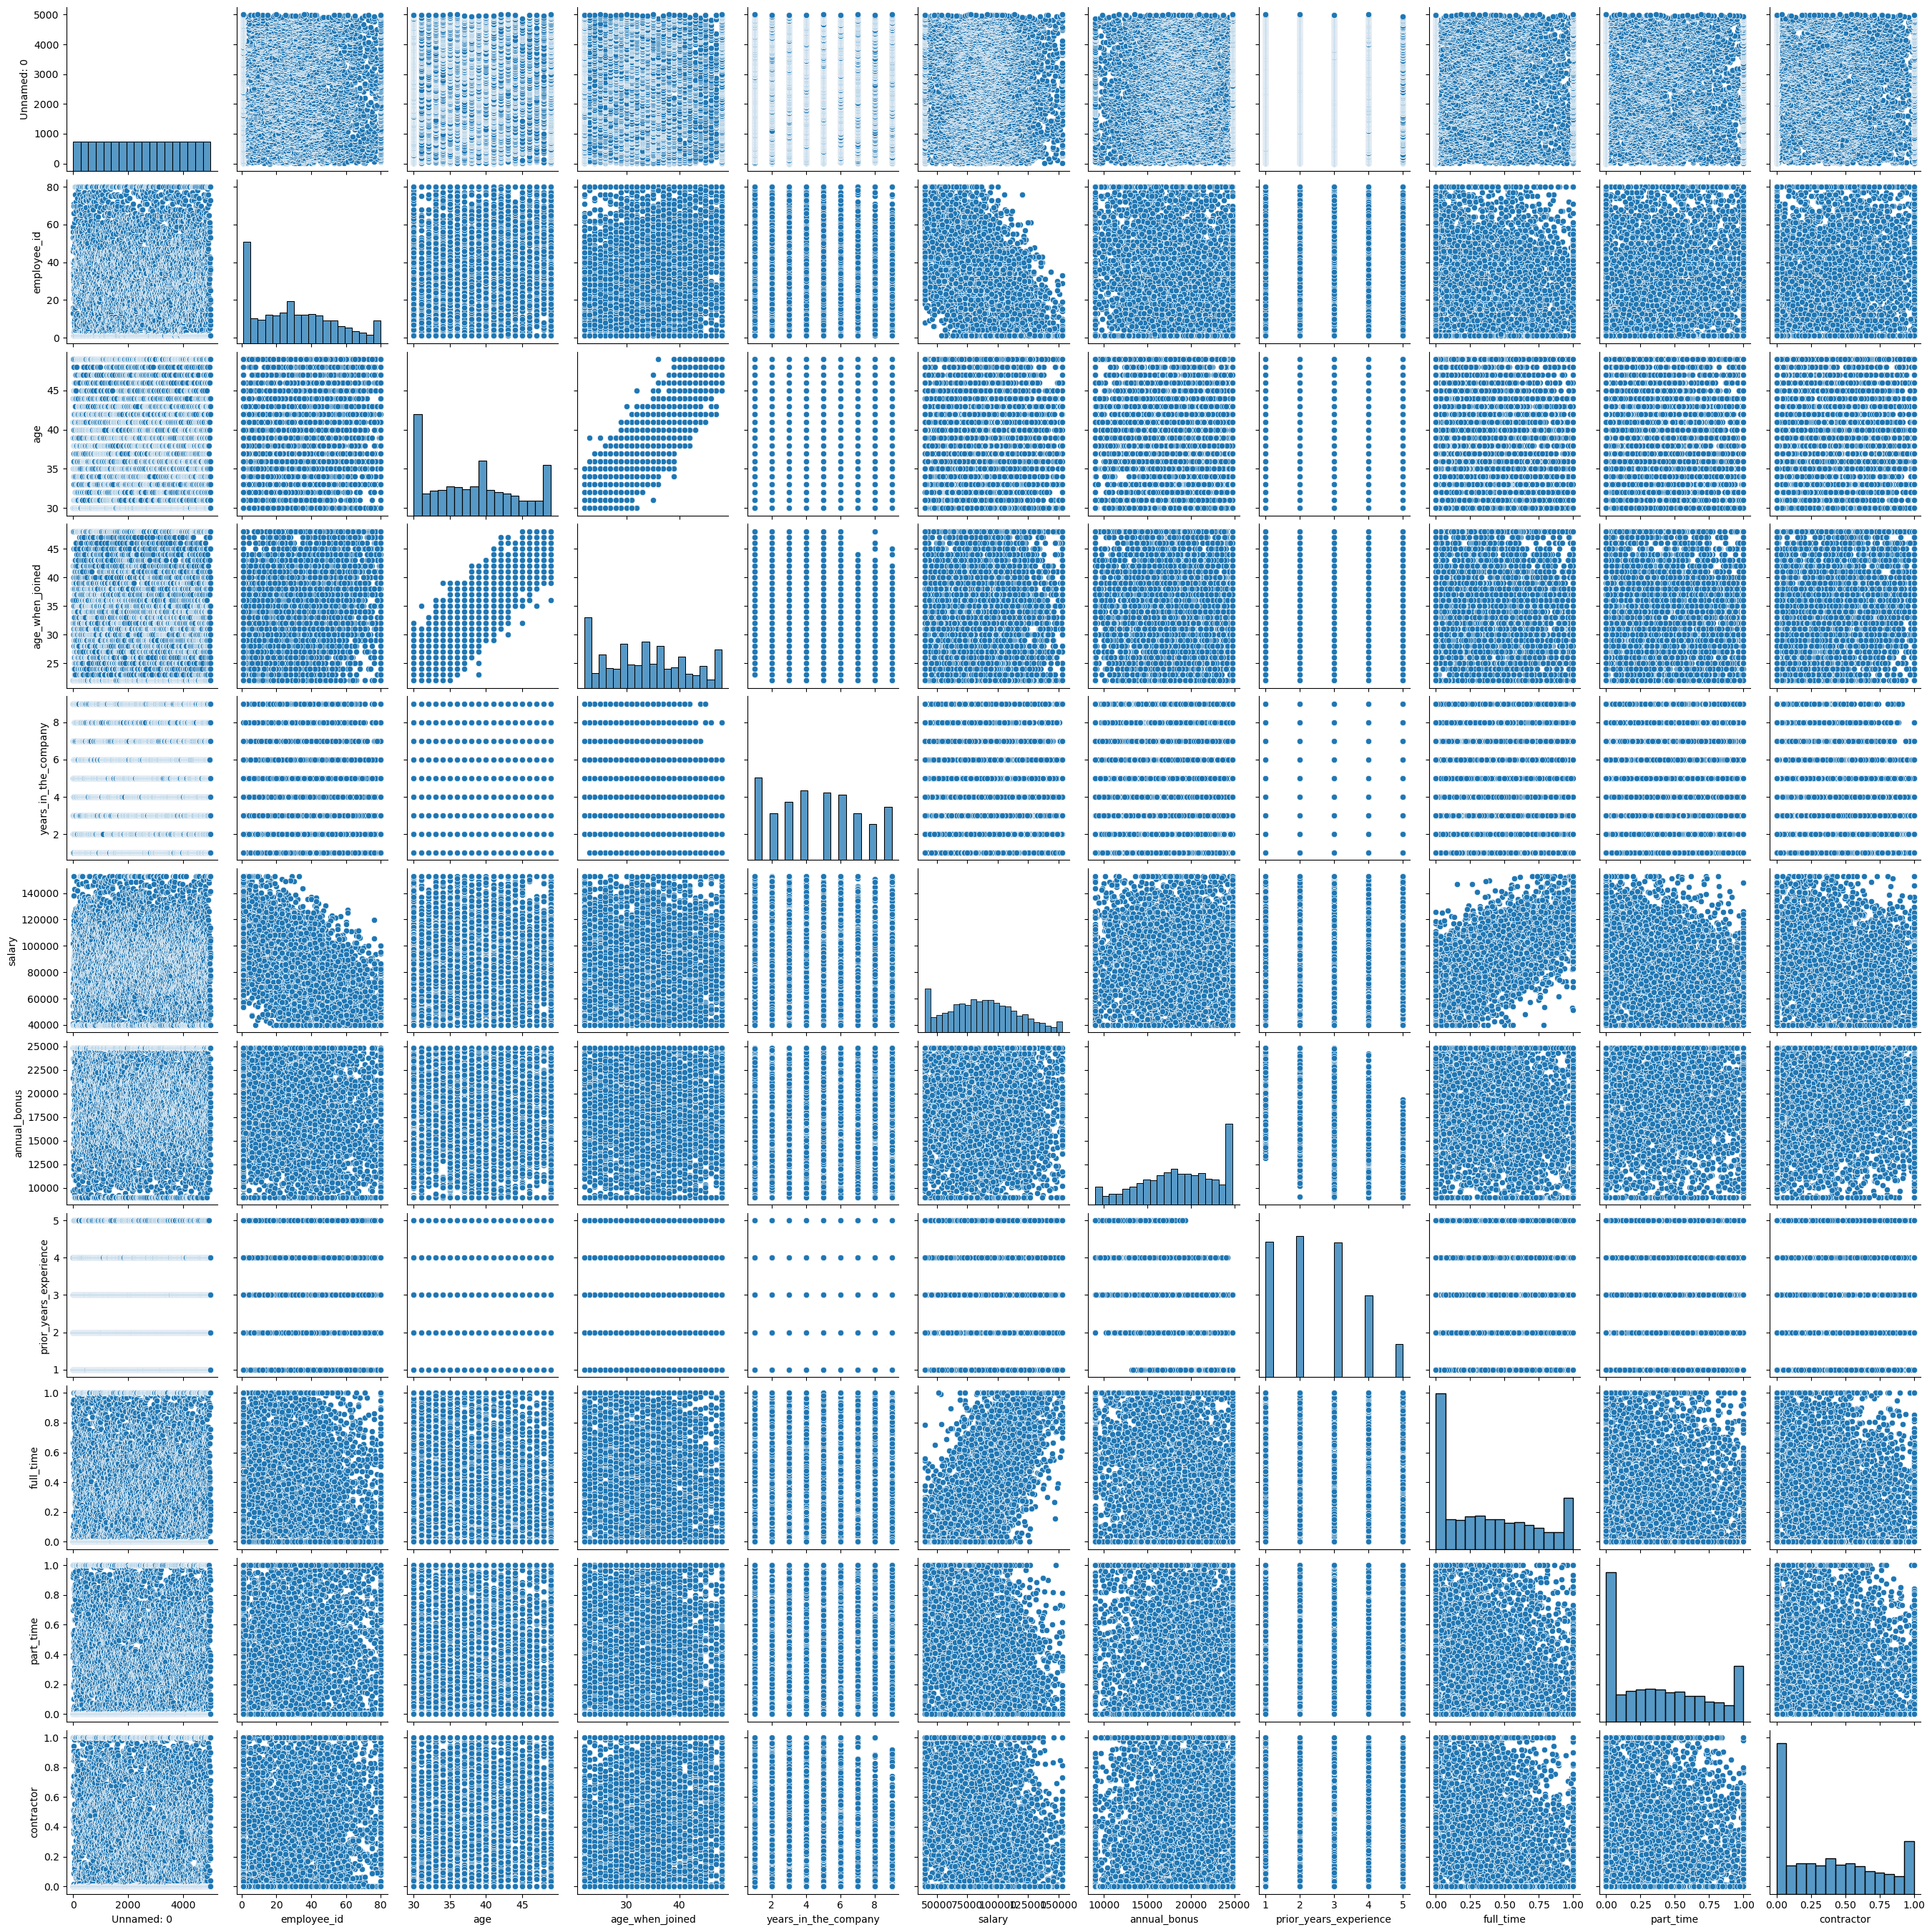

In [36]:
sns.pairplot(df)